In [0]:
## Import libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics.cluster import homogeneity_score

## Determine text color for the plots
plt.rcParams['text.color'] = 'black'



#Connection to Blob Storage

In [0]:
## access to blob storage with key

storage_account_name = "bsintermedio1"
storage_account_access_key = "R7QTh7yi3SFeToFYrPrtcH/IRxUZI1n2arC7iezr/zpwHw5DmT9MDBqR4TJ2Q/p88LrCaROE1gs4B/6dVVL8UA=="

spark.conf.set("fs.azure.account.key." + storage_account_name + ".blob.core.windows.net", storage_account_access_key)

####CONFIRM ACCESS TO DATA

In [0]:
%fs
ls  "wasbs://blobkompras@bsintermedio1.blob.core.windows.net/"

path name size wasbs://blobkompras@bsintermedio1.blob.core.windows.net/OrdenesdecompraPORTAL1K.xlsx OrdenesdecompraPORTAL1K.xlsx 7927129 wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_Data_Cleaned.ipynb Proveindustriales_Data_Cleaned.ipynb 871958 wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv 7122583 wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_Dic_2/ Proveindustriales_Dic_2/ 0 wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_Model_3_Cluster_Selected.ipynb Proveindustriales_Model_3_Cluster_Selected.ipynb 7200059 wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_completo.xls Proveindustriales_completo.xls 4473344 wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_completo.xlsx Proveindustriales_completo.xlsx 1448157 wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_completo_y_clusters.xlsx Proveindustriales_completo_y_clusters.xlsx 1580893 wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_completo_y_clusters1.xls Proveindustriales_completo_y_clusters1.xls 4711424

####MOUNT UNIT DATABRICKS BLOB STORAGE

In [0]:
%fs
ls /mnt/data/

path name size dbfs:/mnt/data/OrdenesdecompraPORTAL1K.xlsx OrdenesdecompraPORTAL1K.xlsx 7927129 dbfs:/mnt/data/Proveindustriales_Data_Cleaned.ipynb Proveindustriales_Data_Cleaned.ipynb 871958 dbfs:/mnt/data/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv 7122583 dbfs:/mnt/data/Proveindustriales_Dic_2/ Proveindustriales_Dic_2/ 0 dbfs:/mnt/data/Proveindustriales_Model_3_Cluster_Selected.ipynb Proveindustriales_Model_3_Cluster_Selected.ipynb 7200059 dbfs:/mnt/data/Proveindustriales_completo.xls Proveindustriales_completo.xls 4473344 dbfs:/mnt/data/Proveindustriales_completo.xlsx Proveindustriales_completo.xlsx 1448157 dbfs:/mnt/data/Proveindustriales_completo_y_clusters.xlsx Proveindustriales_completo_y_clusters.xlsx 1580893 dbfs:/mnt/data/Proveindustriales_completo_y_clusters1.xls Proveindustriales_completo_y_clusters1.xls 4711424

In [0]:
## access to the container

blob_container = 'blobkompras'
filePath = "wasbs://" + blob_container + "@" + storage_account_name + ".blob.core.windows.net/mnt/data/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv"
##df = spark.read.format("csv").load(filePath), inferSchema = True, header = True)

## read the raw data
df = pd.read_csv("/dbfs/mnt/data/Proveindustriales_Dic_2/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv",sep =",")

In [0]:
#df = pd.read_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv')

#Data description

In [0]:
df.shape

Out[89]: (22392, 27)

In [0]:
df.head()

Out[90]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Otros 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORIA_Alimentos preparados y conservados 
 SUBCATEGORIA_Bebidas 
 SUBCATEGORIA_Elementos de aseo y limpieza 
 SUBCATEGORIA_Elementos de papelería 
 SUBCATEGORIA_Otros 
 SUBCATEGORIA_Productos de carne y aves de corral 
 SUBCATEGORIA_Productos lácteos y huevos 
 SUBCATEGORIA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 PORTAL_Otros 
 PORTAL_Portal comprador 1 
 PORTAL_Portal comprador 2 
 PORTAL_Portal comprador 24 
 PORTAL_Portal comprador 29 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_SIN_IVA 
 
 
 
 
 0 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.45 
 0.08 
 0.89 
 
 
 1 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.70 
 0.13 
 0.70 
 
 
 2 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.10 
 0.00 
 1.00 
 
 
 3 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.02 
 0.00 
 1.00 
 
 
 4 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.14 
 0.03 
 0.99

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 27 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 CATEGORÍA_Alimentos y Bebidas 22392 non-null float64
 1 CATEGORÍA_Aseo, Cafetería y Oficina 22392 non-null float64
 2 CATEGORÍA_Dotación y elementos de protección personal 22392 non-null float64
 3 CATEGORÍA_Otros 22392 non-null float64
 4 CATEGORÍA_Vigilancia y seguridad industrial 22392 non-null float64
 5 SUBCATEGORIA_Alimentos preparados y conservados 22392 non-null float64
 6 SUBCATEGORIA_Bebidas 22392 non-null float64
 7 SUBCATEGORIA_Elementos de aseo y limpieza 22392 non-null float64
 8 SUBCATEGORIA_Elementos de papelería 22392 non-null float64
 9 SUBCATEGORIA_Otros 22392 non-null float64
 10 SUBCATEGORIA_Productos de carne y aves de corral 22392 non-null float64
 11 SUBCATEGORIA_Productos lácteos y huevos 22392 non-null float64
 12 SUBCATEGORIA_Seguridad y protección personal 22392 non-null float64
 13 PROVEEDOR_Otros 22392 non-null float64
 14 PROVEEDOR_Proveedor 28 22392 non-null float64
 15 PROVEEDOR_Proveedor 301 22392 non-null float64
 16 PROVEEDOR_Proveedor 59 22392 non-null float64
 17 PORTAL_Otros 22392 non-null float64
 18 PORTAL_Portal comprador 1 22392 non-null float64
 19 PORTAL_Portal comprador 2 22392 non-null float64
 20 PORTAL_Portal comprador 24 22392 non-null float64
 21 PORTAL_Portal comprador 29 22392 non-null float64
 22 CANTIDAD_PEDIDA 22392 non-null float64
 23 CANTIDAD_RECIBIDA 22392 non-null float64
 24 PRECIO_UNITARIO 22392 non-null float64
 25 IVA 22392 non-null float64
 26 TOTAL_SIN_IVA 22392 non-null float64
dtypes: float64(27)
memory usage: 4.6 MB

In [0]:
df.columns

Out[92]: Index(['CATEGORÍA_Alimentos y Bebidas', 'CATEGORÍA_Aseo, Cafetería y Oficina',
 'CATEGORÍA_Dotación y elementos de protección personal',
 'CATEGORÍA_Otros', 'CATEGORÍA_Vigilancia y seguridad industrial',
 'SUBCATEGORIA_Alimentos preparados y conservados',
 'SUBCATEGORIA_Bebidas', 'SUBCATEGORIA_Elementos de aseo y limpieza',
 'SUBCATEGORIA_Elementos de papelería', 'SUBCATEGORIA_Otros',
 'SUBCATEGORIA_Productos de carne y aves de corral',
 'SUBCATEGORIA_Productos lácteos y huevos',
 'SUBCATEGORIA_Seguridad y protección personal', 'PROVEEDOR_Otros',
 'PROVEEDOR_Proveedor 28', 'PROVEEDOR_Proveedor 301',
 'PROVEEDOR_Proveedor 59', 'PORTAL_Otros', 'PORTAL_Portal comprador 1',
 'PORTAL_Portal comprador 2', 'PORTAL_Portal comprador 24',
 'PORTAL_Portal comprador 29', 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA',
 'PRECIO_UNITARIO', 'IVA', 'TOTAL_SIN_IVA'],
 dtype='object')

# Clustering

In [0]:
from sklearn import metrics
from sklearn.cluster import KMeans

#### ELBOW METHOD

In [0]:
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Out[95]:

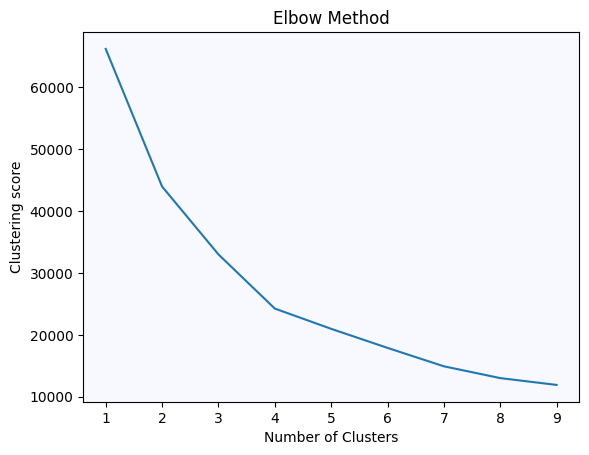

Text(0, 0.5, 'Clustering score')

In [0]:
# graphic code
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

In [0]:
wcss

Out[96]: [66136.71127135894,
 43933.516874107474,
 32981.76069015424,
 24237.351650734738,
 20965.3407584025,
 17889.71584393824,
 14916.573181556581,
 13014.572467435111,
 11912.690431833918]

In [0]:
for i in range (1, 10):
    print(i, wcss[i-1])

1 66136.71127135894
2 43933.516874107474
3 32981.76069015424
4 24237.351650734738
5 20965.3407584025
6 17889.71584393824
7 14916.573181556581
8 13014.572467435111
9 11912.690431833918

In [0]:
# select # of cluster based on strength
elbow_table=pd.DataFrame()
elbow_table['k'] = [1,2,3,4,5,6,7,8,9]
elbow_table['Score'] = wcss
for i in range (1, len(elbow_table)):
    elbow_table.loc[i,'Delta1'] = elbow_table.loc[i-1,'Score'] - elbow_table.loc[i,'Score']
for i in range (2, len(elbow_table)):
    elbow_table.loc[i,'Delta2'] = elbow_table.loc[i-1,'Delta1'] - elbow_table.loc[i,'Delta1']
for i in range (1, len(elbow_table)-1):
    elbow_table.loc[i,'Strength'] = elbow_table.loc[i+1,'Delta2'] - elbow_table.loc[i+1,'Delta1']
for i in range (1, len(elbow_table)-1):
    elbow_table.loc[i,'Relative_Strength'] = elbow_table.loc[i,'Strength'] / elbow_table.loc[i,'k']
elbow_table

Out[98]:

k 
 Score 
 Delta1 
 Delta2 
 Strength 
 Relative_Strength 
 
 
 
 
 0 
 1 
 66,136.71 
 nan 
 nan 
 nan 
 nan 
 
 
 1 
 2 
 43,933.52 
 22,203.19 
 nan 
 299.68 
 149.84 
 
 
 2 
 3 
 32,981.76 
 10,951.76 
 11,251.44 
 -6,537.06 
 -2,179.02 
 
 
 3 
 4 
 24,237.35 
 8,744.41 
 2,207.35 
 2,200.39 
 550.10 
 
 
 4 
 5 
 20,965.34 
 3,272.01 
 5,472.40 
 -2,879.24 
 -575.85 
 
 
 5 
 6 
 17,889.72 
 3,075.62 
 196.39 
 -2,870.66 
 -478.44 
 
 
 6 
 7 
 14,916.57 
 2,973.14 
 102.48 
 -830.86 
 -118.69 
 
 
 7 
 8 
 13,014.57 
 1,902.00 
 1,071.14 
 -301.76 
 -37.72 
 
 
 8 
 9 
 11,912.69 
 1,101.88 
 800.12 
 nan 
 nan

In [0]:
n_clusters_sort = elbow_table.sort_values(by='Relative_Strength', ascending=False)
n_clusters_sort

Out[99]:

k 
 Score 
 Delta1 
 Delta2 
 Strength 
 Relative_Strength 
 
 
 
 
 3 
 4 
 24,237.35 
 8,744.41 
 2,207.35 
 2,200.39 
 550.10 
 
 
 1 
 2 
 43,933.52 
 22,203.19 
 nan 
 299.68 
 149.84 
 
 
 7 
 8 
 13,014.57 
 1,902.00 
 1,071.14 
 -301.76 
 -37.72 
 
 
 6 
 7 
 14,916.57 
 2,973.14 
 102.48 
 -830.86 
 -118.69 
 
 
 5 
 6 
 17,889.72 
 3,075.62 
 196.39 
 -2,870.66 
 -478.44 
 
 
 4 
 5 
 20,965.34 
 3,272.01 
 5,472.40 
 -2,879.24 
 -575.85 
 
 
 2 
 3 
 32,981.76 
 10,951.76 
 11,251.44 
 -6,537.06 
 -2,179.02 
 
 
 0 
 1 
 66,136.71 
 nan 
 nan 
 nan 
 nan 
 
 
 8 
 9 
 11,912.69 
 1,101.88 
 800.12 
 nan 
 nan

In [0]:
# optimal # of cluster = higher strenght value
optimal_n_clusters = n_clusters_sort.iloc[0,0]
optimal_n_clusters

Out[100]: 4

#### CLUSTER TO PREDICT

In [0]:
df_to_predict = df.copy()

#This df_to_predict will be used at the end of this script in order to predict new entries

#### CREATE THE CLUSTER WITH OPTIMAL N_CLUSTER

In [0]:
clustering = KMeans(n_clusters=optimal_n_clusters, max_iter=300)
clustering.fit(df)

Out[102]: KMeans(n_clusters=4)

#### CLUSTER CENTERS

Data Frame of n clusters with normalized data

In [0]:
df_centroids = pd.DataFrame(clustering.cluster_centers_, columns=df.columns)
df_centroids

Out[103]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Otros 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORIA_Alimentos preparados y conservados 
 SUBCATEGORIA_Bebidas 
 SUBCATEGORIA_Elementos de aseo y limpieza 
 SUBCATEGORIA_Elementos de papelería 
 SUBCATEGORIA_Otros 
 SUBCATEGORIA_Productos de carne y aves de corral 
 SUBCATEGORIA_Productos lácteos y huevos 
 SUBCATEGORIA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 PORTAL_Otros 
 PORTAL_Portal comprador 1 
 PORTAL_Portal comprador 2 
 PORTAL_Portal comprador 24 
 PORTAL_Portal comprador 29 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_SIN_IVA 
 
 
 
 
 0 
 0.00 
 -0.00 
 0.00 
 -0.00 
 1.00 
 -0.00 
 0.00 
 0.00 
 -0.00 
 -0.00 
 0.00 
 -0.00 
 1.00 
 0.00 
 0.00 
 1.00 
 -0.00 
 0.00 
 -0.00 
 -0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.16 
 0.03 
 0.96 
 
 
 1 
 1.00 
 -0.00 
 0.00 
 -0.00 
 0.00 
 0.32 
 0.19 
 0.00 
 0.00 
 0.26 
 0.11 
 0.10 
 0.00 
 1.00 
 -0.00 
 -0.00 
 0.00 
 0.06 
 0.02 
 0.45 
 -0.00 
 0.47 
 0.00 
 0.00 
 0.15 
 0.02 
 0.96 
 
 
 2 
 0.01 
 0.03 
 0.19 
 0.68 
 0.09 
 -0.00 
 0.00 
 0.00 
 0.00 
 0.91 
 -0.00 
 -0.00 
 0.09 
 1.00 
 0.00 
 0.00 
 0.00 
 0.31 
 0.62 
 0.07 
 0.00 
 0.01 
 0.01 
 0.00 
 0.33 
 0.05 
 0.88 
 
 
 3 
 0.00 
 1.00 
 0.00 
 0.00 
 -0.00 
 -0.00 
 0.00 
 0.55 
 0.45 
 0.00 
 -0.00 
 -0.00 
 -0.00 
 0.19 
 0.39 
 0.00 
 0.42 
 0.23 
 0.68 
 0.08 
 0.00 
 0.00 
 0.00 
 0.00 
 0.43 
 0.06 
 0.86

#### DF WITH LABELS OF CLUSTER

In [0]:
df['KMeans_Cluster'] = clustering.labels_
df.head()

Out[104]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Otros 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORIA_Alimentos preparados y conservados 
 SUBCATEGORIA_Bebidas 
 SUBCATEGORIA_Elementos de aseo y limpieza 
 SUBCATEGORIA_Elementos de papelería 
 SUBCATEGORIA_Otros 
 SUBCATEGORIA_Productos de carne y aves de corral 
 SUBCATEGORIA_Productos lácteos y huevos 
 SUBCATEGORIA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 PORTAL_Otros 
 PORTAL_Portal comprador 1 
 PORTAL_Portal comprador 2 
 PORTAL_Portal comprador 24 
 PORTAL_Portal comprador 29 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_SIN_IVA 
 KMeans_Cluster 
 
 
 
 
 0 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.45 
 0.08 
 0.89 
 2 
 
 
 1 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.70 
 0.13 
 0.70 
 2 
 
 
 2 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.10 
 0.00 
 1.00 
 1 
 
 
 3 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.02 
 0.00 
 1.00 
 1 
 
 
 4 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.14 
 0.03 
 0.99 
 2

In [0]:
df.shape

Out[105]: (22392, 28)

#### BRING THE ORIGINAL DF TO ADD CLUSTER LABELS

In [0]:
df_original = pd.read_excel('/dbfs/mnt/data/Proveindustriales_Dic_2/Proveindustriales_completo.xls')

In [0]:
df_original.head()

Out[107]:

FECHA_ORDEN 
 CATEGORÍA 
 SUBCATEGORIA 
 PROVEEDOR 
 PORTAL 
 ESTADO 
 PRODUCTO_O_SERVICIO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_SIN_IVA 
 
 
 
 
 0 
 2021-11-10 
 Otros 
 Otros 
 Otros 
 Portal comprador 1 
 Orden en Proceso 
 Otros 
 2.00 
 0.00 
 23364 
 4439 
 46728 
 
 
 1 
 2021-11-10 
 Otros 
 Otros 
 Otros 
 Portal comprador 1 
 Recibido 
 Otros 
 1.00 
 1.00 
 1476972 
 280625 
 1476972 
 
 
 2 
 2021-11-10 
 Alimentos y Bebidas 
 Alimentos preparados y conservados 
 Otros 
 Portal comprador 1 
 Orden en Proceso 
 Otros 
 10.00 
 0.00 
 15500 
 0 
 155000 
 
 
 3 
 2021-11-10 
 Alimentos y Bebidas 
 Productos de carne y aves de corral 
 Otros 
 Portal comprador 2 
 Orden en Proceso 
 Otros 
 50.00 
 0.00 
 22000 
 0 
 1100000 
 
 
 4 
 2021-11-10 
 Otros 
 Otros 
 Otros 
 Otros 
 Recibido 
 Otros 
 7.00 
 7.00 
 92084 
 17496 
 644588

In [0]:
df_original.shape

Out[108]: (22392, 12)

In [0]:
df_original['KMeans_Cluster'] = clustering.labels_
df_original['KMeans_Cluster'] = df_original['KMeans_Cluster']
df_original_plus_clusters = df_original
df_original.sample(n=7)

Out[109]:

FECHA_ORDEN 
 CATEGORÍA 
 SUBCATEGORIA 
 PROVEEDOR 
 PORTAL 
 ESTADO 
 PRODUCTO_O_SERVICIO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_SIN_IVA 
 KMeans_Cluster 
 
 
 
 
 16623 
 2019-11-30 
 Vigilancia y seguridad industrial 
 Seguridad y protección personal 
 Proveedor 301 
 Portal comprador 24 
 Recibido 
 Otros 
 6.00 
 6.00 
 96401 
 18316 
 578405 
 0 
 
 
 334 
 2021-11-03 
 Alimentos y Bebidas 
 Bebidas 
 Otros 
 Portal comprador 1 
 Orden en Proceso 
 Otros 
 1.00 
 0.00 
 99161 
 18841 
 99161 
 1 
 
 
 21861 
 2018-06-07 
 Alimentos y Bebidas 
 Otros 
 Otros 
 Portal comprador 29 
 Orden en Proceso 
 Otros 
 120.00 
 0.00 
 727 
 138 
 87227 
 1 
 
 
 16084 
 2019-12-03 
 Vigilancia y seguridad industrial 
 Seguridad y protección personal 
 Proveedor 301 
 Portal comprador 24 
 Recibido 
 Otros 
 3.00 
 3.00 
 15126 
 2874 
 45378 
 0 
 
 
 5336 
 2021-06-08 
 Alimentos y Bebidas 
 Bebidas 
 Otros 
 Portal comprador 2 
 Recibido 
 Otros 
 8.00 
 8.00 
 27059 
 5141 
 216471 
 1 
 
 
 12696 
 2020-02-26 
 Vigilancia y seguridad industrial 
 Seguridad y protección personal 
 Proveedor 301 
 Portal comprador 24 
 Recibido 
 6 Bota de seguridad media caña dielectrica con... 
 5.00 
 5.00 
 86555 
 16445 
 432773 
 0 
 
 
 20610 
 2018-08-31 
 Aseo, Cafetería y Oficina 
 Elementos de papelería 
 Otros 
 Otros 
 Orden en Proceso 
 Otros 
 6.00 
 0.00 
 3906 
 742 
 23436 
 3

#### DESCRIBING THE CLUSTER

In [0]:
# numbers format

pd.options.display.float_format = '{:20,.2f}'.format

In [0]:
df_original.head()

Out[111]:

FECHA_ORDEN 
 CATEGORÍA 
 SUBCATEGORIA 
 PROVEEDOR 
 PORTAL 
 ESTADO 
 PRODUCTO_O_SERVICIO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_SIN_IVA 
 KMeans_Cluster 
 
 
 
 
 0 
 2021-11-10 
 Otros 
 Otros 
 Otros 
 Portal comprador 1 
 Orden en Proceso 
 Otros 
 2.00 
 0.00 
 23364 
 4439 
 46728 
 2 
 
 
 1 
 2021-11-10 
 Otros 
 Otros 
 Otros 
 Portal comprador 1 
 Recibido 
 Otros 
 1.00 
 1.00 
 1476972 
 280625 
 1476972 
 2 
 
 
 2 
 2021-11-10 
 Alimentos y Bebidas 
 Alimentos preparados y conservados 
 Otros 
 Portal comprador 1 
 Orden en Proceso 
 Otros 
 10.00 
 0.00 
 15500 
 0 
 155000 
 1 
 
 
 3 
 2021-11-10 
 Alimentos y Bebidas 
 Productos de carne y aves de corral 
 Otros 
 Portal comprador 2 
 Orden en Proceso 
 Otros 
 50.00 
 0.00 
 22000 
 0 
 1100000 
 1 
 
 
 4 
 2021-11-10 
 Otros 
 Otros 
 Otros 
 Otros 
 Recibido 
 Otros 
 7.00 
 7.00 
 92084 
 17496 
 644588 
 2

####GENERAL DESCRIPTION

In [0]:
df_original.groupby('KMeans_Cluster').agg(
    {
    'KMeans_Cluster': 'count',    
    'CATEGORÍA':  lambda x: x.value_counts().index[0],
    'SUBCATEGORIA': lambda x: x.value_counts().index[0],
    'PROVEEDOR': lambda x: x.value_counts().index[0],
    'PORTAL': lambda x: x.value_counts().index[0],
    'CANTIDAD_PEDIDA': 'mean',
    'CANTIDAD_RECIBIDA': 'mean',
    'PRECIO_UNITARIO': 'mean',
    'TOTAL_SIN_IVA': 'mean',
    })

Out[112]:

KMeans_Cluster 
 CATEGORÍA 
 SUBCATEGORIA 
 PROVEEDOR 
 PORTAL 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 TOTAL_SIN_IVA 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 5439 
 Vigilancia y seguridad industrial 
 Seguridad y protección personal 
 Proveedor 301 
 Portal comprador 24 
 42.49 
 42.49 
 39,930.22 
 789,409.55 
 
 
 1 
 6914 
 Alimentos y Bebidas 
 Alimentos preparados y conservados 
 Otros 
 Portal comprador 29 
 399.49 
 12.19 
 15,369.47 
 278,370.68 
 
 
 2 
 6418 
 Otros 
 Otros 
 Otros 
 Portal comprador 1 
 186.27 
 122.19 
 199,487.65 
 675,298.85 
 
 
 3 
 3621 
 Aseo, Cafetería y Oficina 
 Elementos de aseo y limpieza 
 Proveedor 59 
 Portal comprador 1 
 59.47 
 2.57 
 15,171.92 
 38,988.74

In [0]:
pd.crosstab(df_original['KMeans_Cluster'], df_original['CATEGORÍA'], margins=True, normalize='index')

Out[113]:

CATEGORÍA 
 Alimentos y Bebidas 
 Aseo, Cafetería y Oficina 
 Dotación y elementos de protección personal 
 Otros 
 Vigilancia y seguridad industrial 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 
 
 
 0 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 
 
 1 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 
 
 2 
 0.01 
 0.03 
 0.19 
 0.68 
 0.09 
 
 
 3 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 
 
 All 
 0.31 
 0.17 
 0.05 
 0.20 
 0.27

In [0]:
df_original.columns

Out[114]: Index(['FECHA_ORDEN', 'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'PORTAL',
 'ESTADO', 'PRODUCTO_O_SERVICIO', 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA',
 'PRECIO_UNITARIO', 'IVA', 'TOTAL_SIN_IVA', 'KMeans_Cluster'],
 dtype='object')

# Statistical cluster description

#ML-PBO-TRANSACTIONS DASHBOARD

####CLUSTER PARTICULAR DESCRIPTION

In [0]:
import matplotlib.colors

plt.rcParams['axes.facecolor'] = 'ghostwhite'
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgreen","skyblue","cadetblue","cornflowerblue","navy","darkturquoise"])


#### QUANTITY OF CLUSTERS

In [0]:
df_original['KMeans_Cluster'].value_counts()

Out[116]: 1 6914
2 6418
0 5439
3 3621
Name: KMeans_Cluster, dtype: int64

Out[117]:

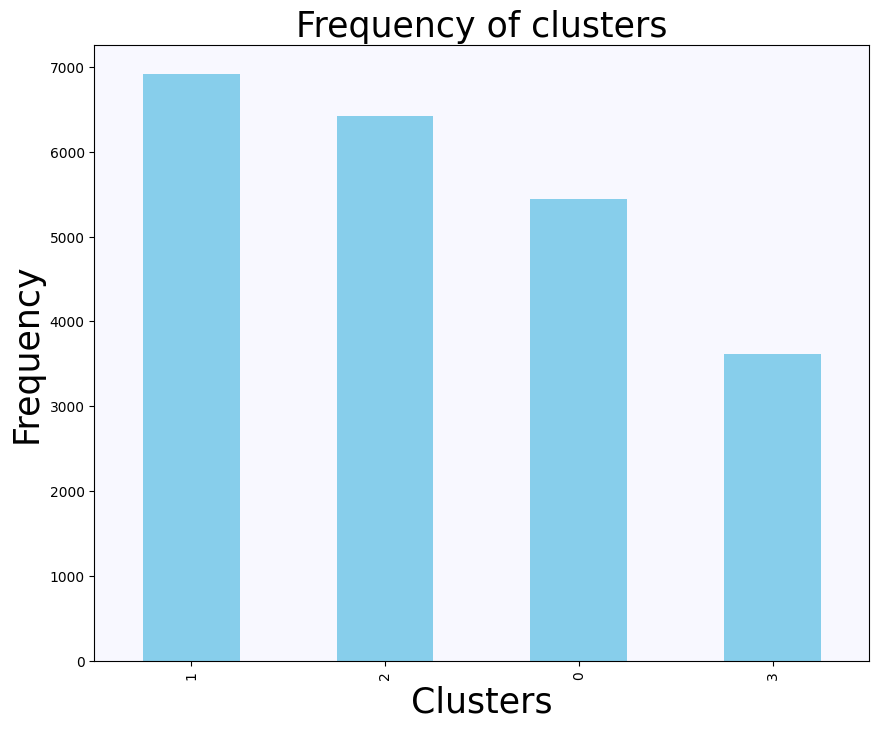

Text(0.5, 1.0, 'Frequency of clusters')

In [0]:
df_original['KMeans_Cluster'].value_counts().plot(kind='bar',figsize=(10,8),color=('skyblue'))
plt.xlabel('Clusters',fontsize=25)
plt.ylabel('Frequency',fontsize=25)
plt.title('Frequency of clusters',fontsize=25)

#### GROUPBY CLUSTERS-ESTADO

In [0]:
df_original_estado = df_original.groupby('KMeans_Cluster')['ESTADO'].value_counts()
df_original_estado

Out[118]: KMeans_Cluster ESTADO 
0 Recibido 5439
1 Orden en Proceso 3344
 Recibido 2596
 Cancelado 380
 Finalizado Incompleto 305
 Orden Rechazada 265
 Pendiente por Aprobar 13
 Recibido Parcial 6
 Enviado 5
2 Recibido 3910
 Orden en Proceso 1063
 Cancelado 551
 Orden Rechazada 486
 Finalizado Incompleto 216
 Recibido Parcial 154
 Pendiente por Aprobar 22
 Orden Confirmada 10
 Enviado 6
3 Recibido 2247
 Orden en Proceso 465
 Finalizado Incompleto 415
 Orden Rechazada 261
 Cancelado 208
 Pendiente por Aprobar 16
 Orden Confirmada 5
 Recibido Parcial 3
 Enviado 1
Name: ESTADO, dtype: int64

In [0]:
plt.style.use('default')

### Order by estado, higher=RECIBIDO

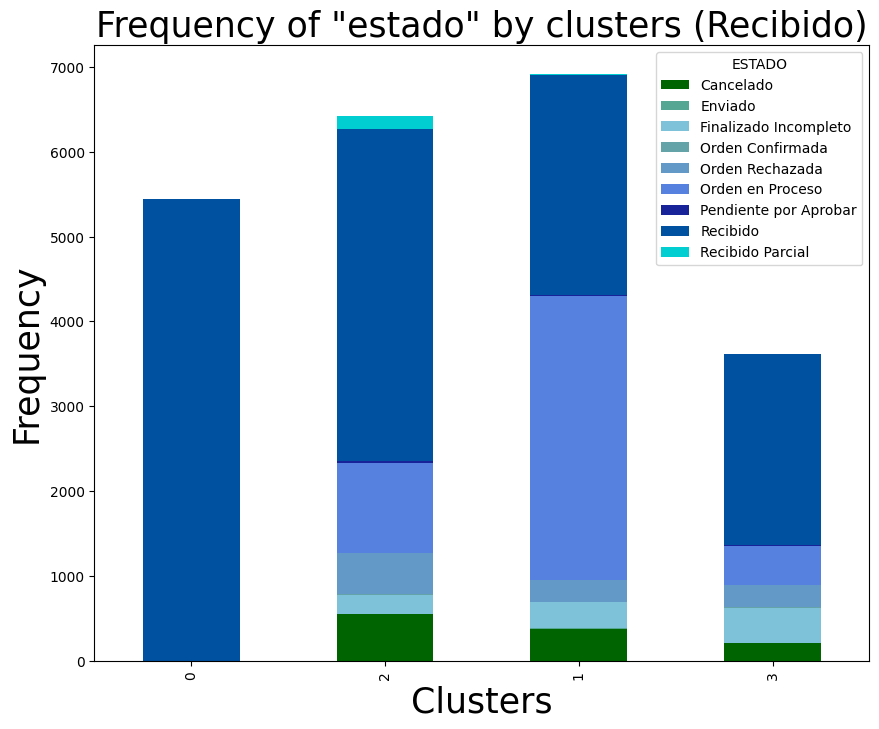

In [0]:
df_original_estado.unstack().sort_values(by='Recibido', ascending=False).plot(kind='bar', stacked=True, figsize=(10,8),cmap=cmap)
plt.xlabel('Clusters',fontsize=25)
plt.ylabel('Frequency',fontsize=25)
plt.title('Frequency of "estado" by clusters (Recibido)',fontsize=25)
plt.rcParams['axes.facecolor'] = 'ghostwhite'

In [0]:
df_original_estado1 = df_original.groupby('ESTADO')['KMeans_Cluster'].value_counts()
df_original_estado1

Out[121]: ESTADO KMeans_Cluster
Cancelado 2 551
 1 380
 3 208
Enviado 2 6
 1 5
 3 1
Finalizado Incompleto 3 415
 1 305
 2 216
Orden Confirmada 2 10
 3 5
Orden Rechazada 2 486
 1 265
 3 261
Orden en Proceso 1 3344
 2 1063
 3 465
Pendiente por Aprobar 2 22
 3 16
 1 13
Recibido 0 5439
 2 3910
 1 2596
 3 2247
Recibido Parcial 2 154
 1 6
 3 3
Name: KMeans_Cluster, dtype: int64

Out[122]:

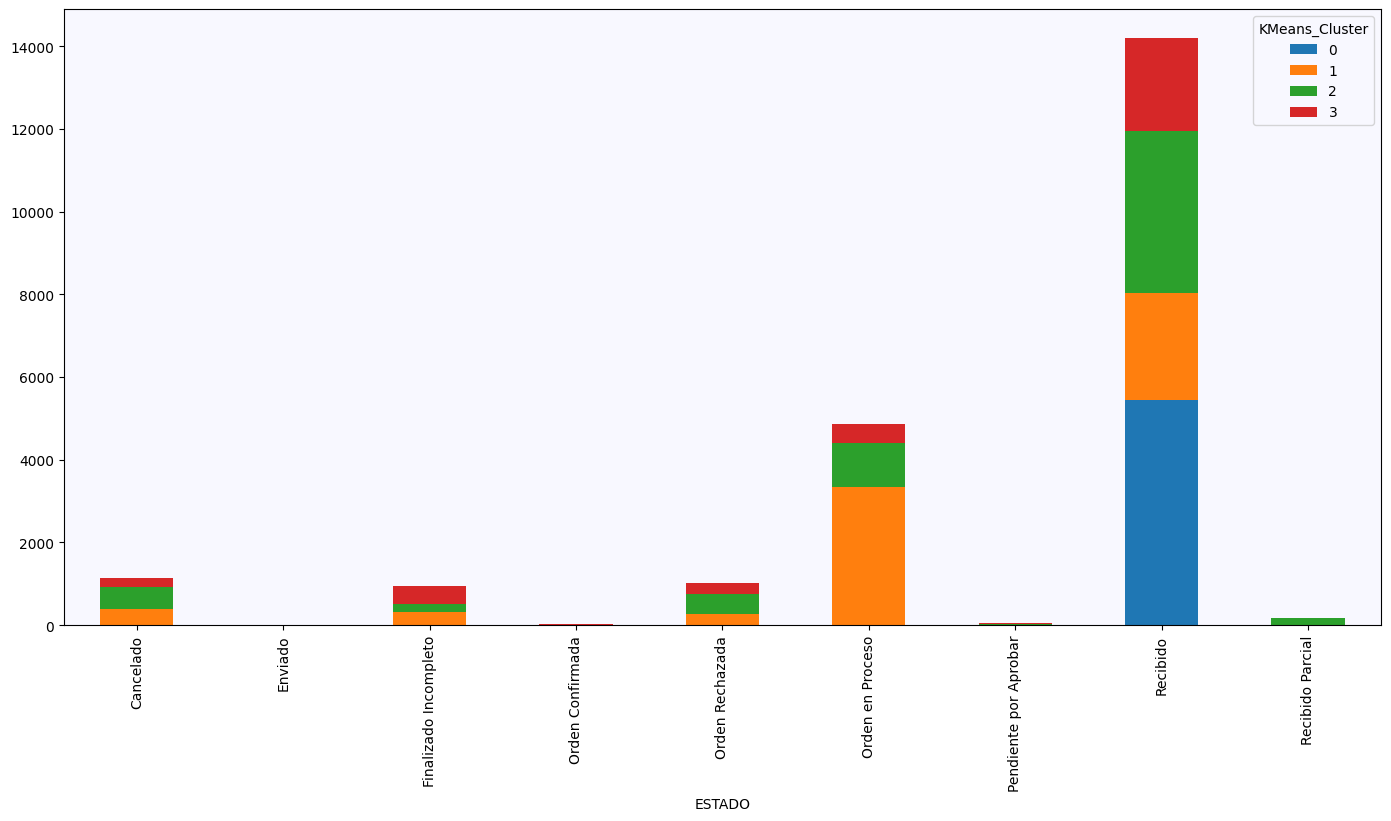

<matplotlib.axes._subplots.AxesSubplot at 0x7f9f89a3ce80>

In [0]:
df_original_estado1.unstack().plot(kind='bar', stacked=True, figsize=(17,8))

#### GROUPBY CLUSTERS-TOTAL+IVA

In [0]:
df_cluster_by_IVA = df_original.groupby('KMeans_Cluster').agg({'TOTAL_SIN_IVA':['mean', 'sum']})
df_cluster_by_IVA

Out[123]:

TOTAL_SIN_IVA 
 
 
 
 mean 
 sum 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 0 
 789,409.55 
 4293598560 
 
 
 1 
 278,370.68 
 1924654890 
 
 
 2 
 675,298.85 
 4334067992 
 
 
 3 
 38,988.74 
 141178245

#### MEAN OF TOTAL_SIN IVA PER CLUSTER

In [0]:
df_cluster_by_IVA_mean = df_original.groupby('KMeans_Cluster')['TOTAL_SIN_IVA'].mean()
df_cluster_by_IVA_mean

Out[124]: KMeans_Cluster
0 789,409.55
1 278,370.68
2 675,298.85
3 38,988.74
Name: TOTAL_SIN_IVA, dtype: float64

Out[125]:

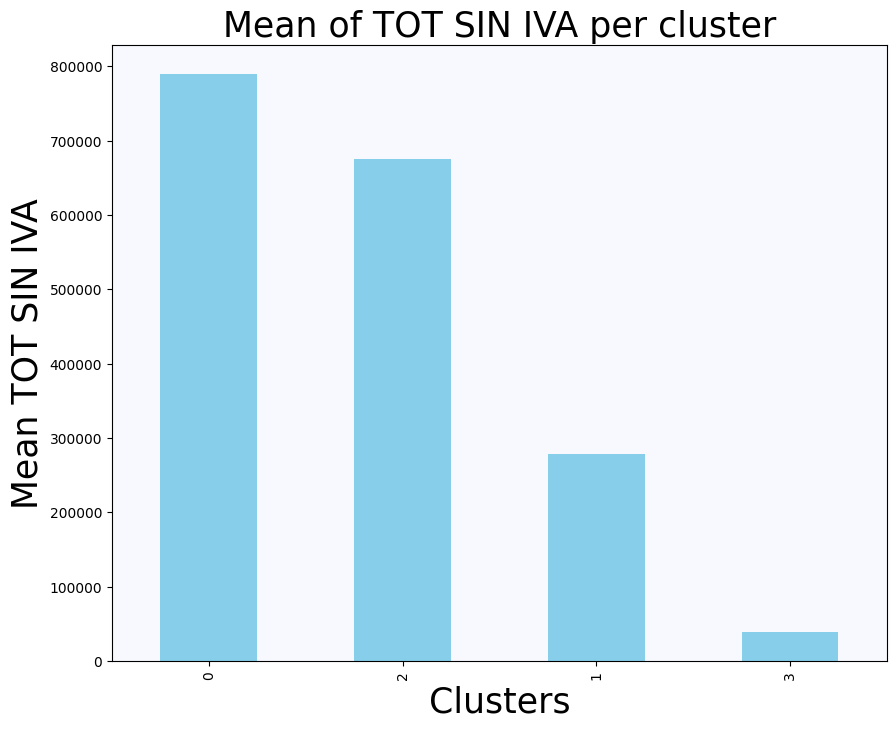

Text(0.5, 1.0, 'Mean of TOT SIN IVA per cluster')

In [0]:
df_cluster_by_IVA_mean.sort_values(ascending=False).plot(kind='bar', stacked=True, figsize=(10,8),color=('skyblue'))
plt.xlabel('Clusters',fontsize=25)
plt.ylabel('Mean TOT SIN IVA',fontsize=25)
plt.title('Mean of TOT SIN IVA per cluster',fontsize=25)

#### SUM OF TAL SIN IVA PEER CLUSTER

In [0]:
df_cluster_by_IVA_sum = df_original.groupby('KMeans_Cluster')['TOTAL_SIN_IVA'].sum()
df_cluster_by_IVA_sum

Out[126]: KMeans_Cluster
0 4293598560
1 1924654890
2 4334067992
3 141178245
Name: TOTAL_SIN_IVA, dtype: int64

Out[127]:

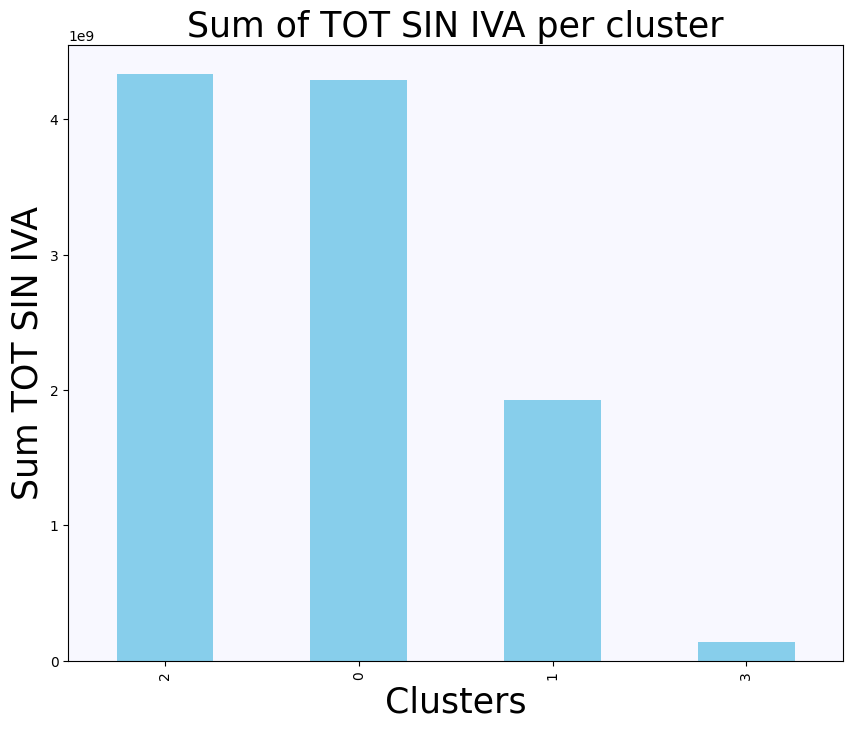

Text(0.5, 1.0, 'Sum of TOT SIN IVA per cluster')

In [0]:
df_cluster_by_IVA_sum.sort_values(ascending=False).plot(kind='bar', stacked=True, figsize=(10,8),color=('skyblue'))
plt.xlabel('Clusters',fontsize=25)
plt.ylabel('Sum TOT SIN IVA',fontsize=25)
plt.title('Sum of TOT SIN IVA per cluster',fontsize=25)

Out[128]:

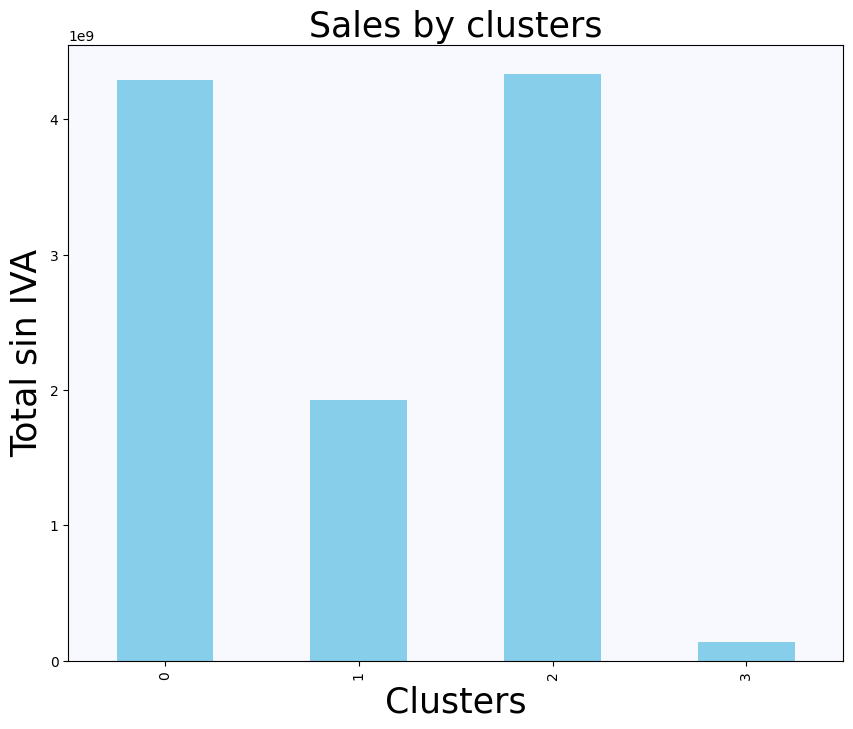

Text(0.5, 1.0, 'Sales by clusters')

In [0]:
df_original.groupby('KMeans_Cluster')['TOTAL_SIN_IVA'].sum().plot(kind='bar', stacked=True, figsize=(10,8),color=('skyblue'))
plt.xlabel('Clusters',fontsize=25)
plt.ylabel('Total sin IVA',fontsize=25)
plt.title('Sales by clusters',fontsize=25)

#### GROUPBY CLUSTER-QUANTITY "PROVEEDORES"

Out[129]:

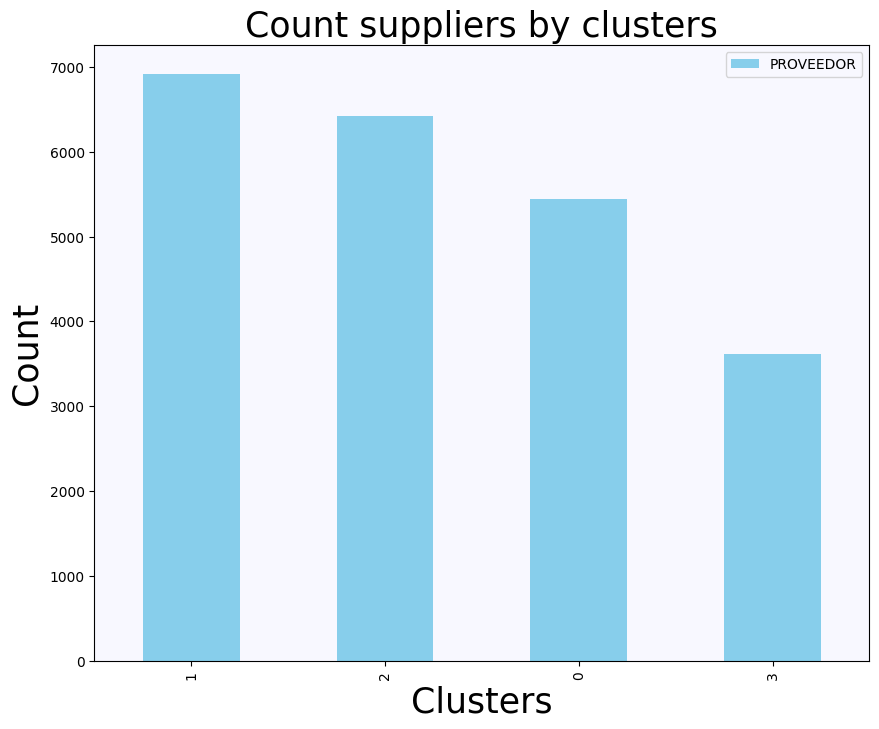

Text(0.5, 1.0, 'Count suppliers by clusters')

In [0]:
df_original.groupby('KMeans_Cluster').agg({'PROVEEDOR':'count'}).sort_values(by='PROVEEDOR',ascending=False).plot(kind='bar', stacked=True, figsize=(10,8),color=('skyblue'))
plt.xlabel('Clusters',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.title('Count suppliers by clusters',fontsize=25)

In [0]:
df_original.columns

Out[130]: Index(['FECHA_ORDEN', 'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'PORTAL',
 'ESTADO', 'PRODUCTO_O_SERVICIO', 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA',
 'PRECIO_UNITARIO', 'IVA', 'TOTAL_SIN_IVA', 'KMeans_Cluster'],
 dtype='object')

#### GROUPBY CLUSTER-COMPANHIA COMPRADORA

Out[131]:

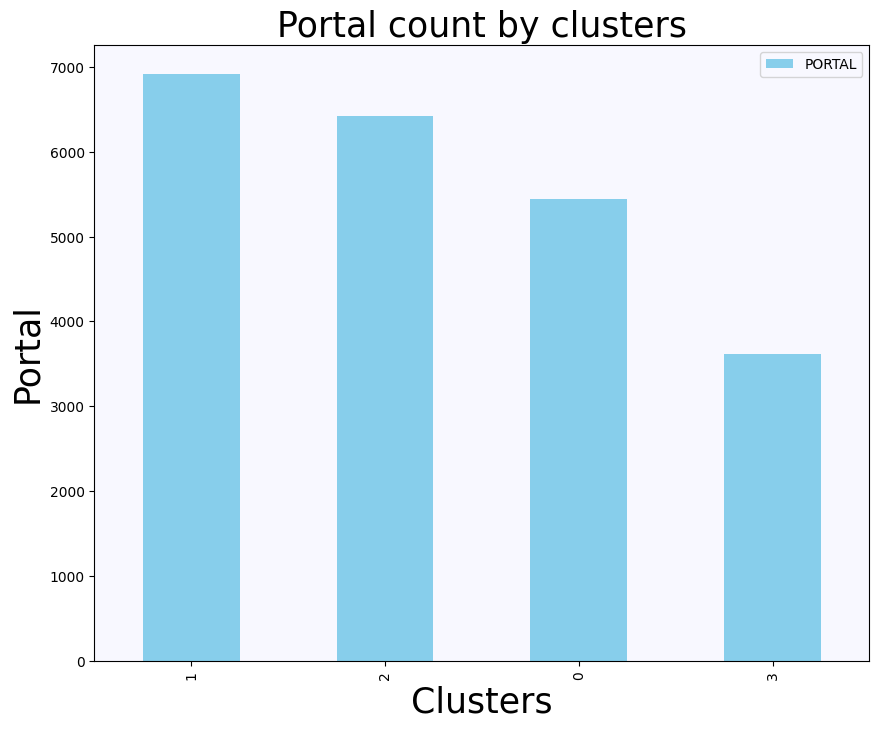

Text(0.5, 1.0, 'Portal count by clusters')

In [0]:
df_original.groupby('KMeans_Cluster').agg({'PORTAL':'count'}).sort_values(by='PORTAL',ascending=False).plot(kind='bar', stacked=True, figsize=(10,8), color=('skyblue'))
plt.xlabel('Clusters',fontsize=25)
plt.ylabel('Portal',fontsize=25)
plt.title('Portal count by clusters',fontsize=25)

In [0]:
df_original.groupby('KMeans_Cluster')['PORTAL'].value_counts().unstack()

Out[132]:

PORTAL 
 Otros 
 Portal comprador 1 
 Portal comprador 2 
 Portal comprador 24 
 Portal comprador 29 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 
 
 
 0 
 nan 
 nan 
 nan 
 5,439.00 
 nan 
 
 
 1 
 402.00 
 104.00 
 3,125.00 
 nan 
 3,283.00 
 
 
 2 
 1,966.00 
 3,984.00 
 431.00 
 nan 
 37.00 
 
 
 3 
 839.00 
 2,475.00 
 307.00 
 nan 
 nan

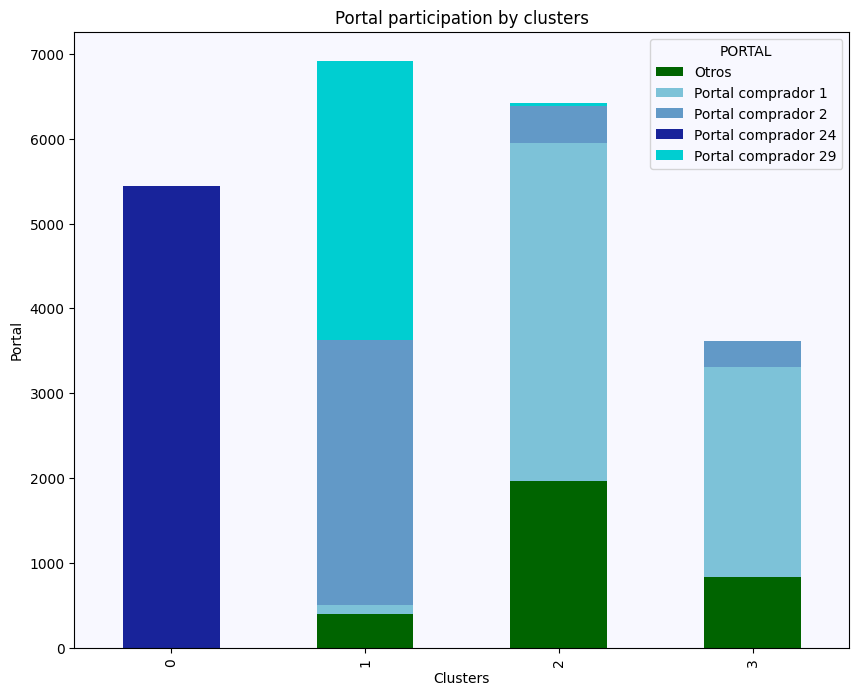

In [0]:
df_original.groupby('KMeans_Cluster')['PORTAL'].value_counts().unstack().plot(kind='bar', stacked=True, cmap=cmap, figsize=(10,8))
plt.xlabel('Clusters')
plt.ylabel('Portal')
plt.title('Portal participation by clusters')
plt.rcParams['axes.facecolor'] = 'ghostwhite'

## GROUPBY CLUSTER-COMPANHIA PROVEEDOR

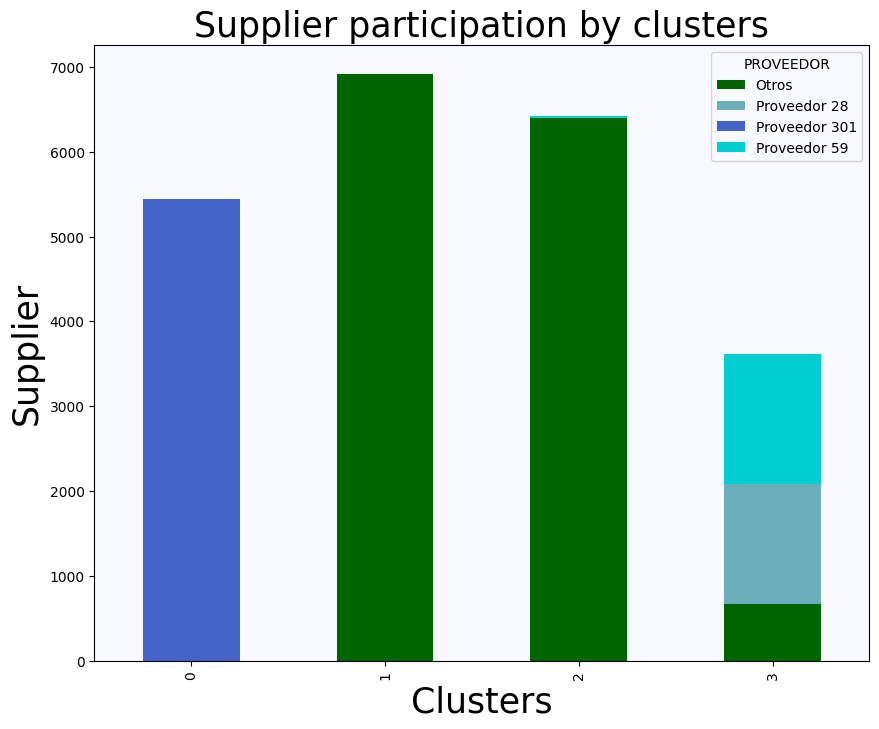

In [0]:
df_original.groupby('KMeans_Cluster')['PROVEEDOR'].value_counts().unstack().plot(kind='bar', stacked=True, cmap=cmap, figsize=(10,8))
plt.xlabel('Clusters',fontsize=25)
plt.ylabel('Supplier',fontsize=25)
plt.title('Supplier participation by clusters',fontsize=25)
plt.rcParams['axes.facecolor'] = 'ghostwhite'

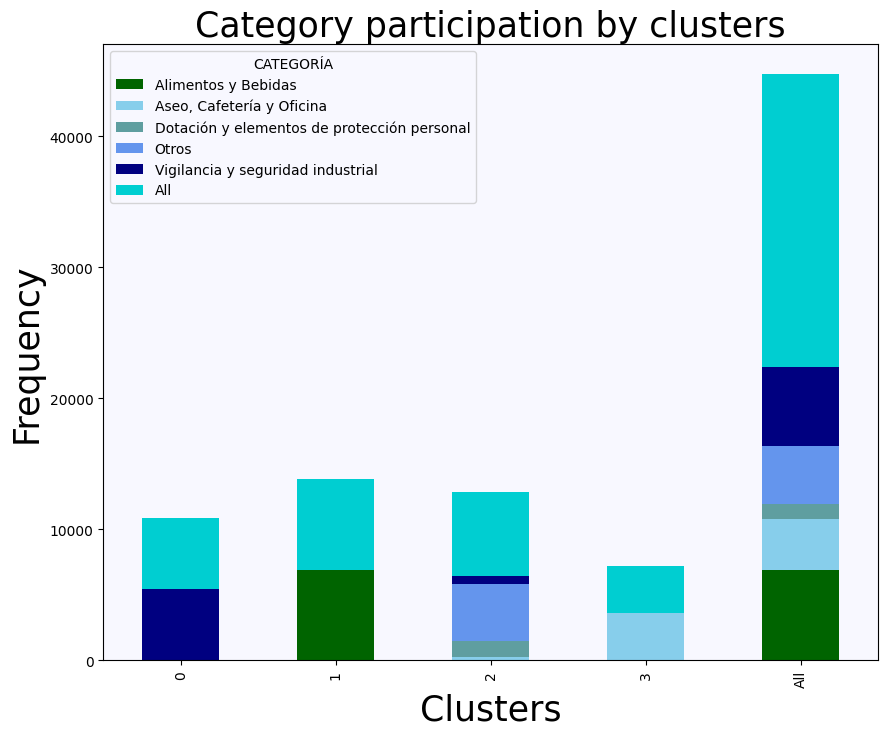

In [0]:
pd.crosstab(df_original['KMeans_Cluster'], df_original['CATEGORÍA'], margins=True).plot(kind='bar', stacked=True, figsize=(10,8), cmap=cmap)
plt.xlabel('Clusters',fontsize=25)
plt.ylabel('Frequency',fontsize=25)
plt.title('Category participation by clusters',fontsize=25)
plt.rcParams['axes.facecolor'] = 'ghostwhite'

In [0]:
#pd.crosstab(df_original['KMeans_Cluster'], [df_original['SUBCATEGORIA'] , df_original['PROVEEDOR']]).plot(kind='bar', stacked=True, figsize=(15,15))

In [0]:
df_original_plus_clusters.to_excel('Proveindustriales_completo_y_clusters.xls', index=False)

In [0]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 13 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 FECHA_ORDEN 22392 non-null datetime64[ns]
 1 CATEGORÍA 22392 non-null object 
 2 SUBCATEGORIA 22392 non-null object 
 3 PROVEEDOR 22392 non-null object 
 4 PORTAL 22392 non-null object 
 5 ESTADO 22392 non-null object 
 6 PRODUCTO_O_SERVICIO 22392 non-null object 
 7 CANTIDAD_PEDIDA 22392 non-null float64 
 8 CANTIDAD_RECIBIDA 22392 non-null float64 
 9 PRECIO_UNITARIO 22392 non-null int64 
 10 IVA 22392 non-null int64 
 11 TOTAL_SIN_IVA 22392 non-null int64 
 12 KMeans_Cluster 22392 non-null int32 
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(6)
memory usage: 2.1+ MB

In [0]:
df_original.select_dtypes(['float', 'int', 'int64', 'float64', 'int32']).columns

Out[139]: Index(['CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO', 'IVA',
 'TOTAL_SIN_IVA', 'KMeans_Cluster'],
 dtype='object')

In [0]:
df1 = df_original

In [0]:
df1

Out[141]:

FECHA_ORDEN 
 CATEGORÍA 
 SUBCATEGORIA 
 PROVEEDOR 
 PORTAL 
 ESTADO 
 PRODUCTO_O_SERVICIO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_SIN_IVA 
 KMeans_Cluster 
 
 
 
 
 0 
 2021-11-10 
 Otros 
 Otros 
 Otros 
 Portal comprador 1 
 Orden en Proceso 
 Otros 
 2.00 
 0.00 
 23364 
 4439 
 46728 
 2 
 
 
 1 
 2021-11-10 
 Otros 
 Otros 
 Otros 
 Portal comprador 1 
 Recibido 
 Otros 
 1.00 
 1.00 
 1476972 
 280625 
 1476972 
 2 
 
 
 2 
 2021-11-10 
 Alimentos y Bebidas 
 Alimentos preparados y conservados 
 Otros 
 Portal comprador 1 
 Orden en Proceso 
 Otros 
 10.00 
 0.00 
 15500 
 0 
 155000 
 1 
 
 
 3 
 2021-11-10 
 Alimentos y Bebidas 
 Productos de carne y aves de corral 
 Otros 
 Portal comprador 2 
 Orden en Proceso 
 Otros 
 50.00 
 0.00 
 22000 
 0 
 1100000 
 1 
 
 
 4 
 2021-11-10 
 Otros 
 Otros 
 Otros 
 Otros 
 Recibido 
 Otros 
 7.00 
 7.00 
 92084 
 17496 
 644588 
 2 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 22387 
 2018-04-30 
 Aseo, Cafetería y Oficina 
 Elementos de papelería 
 Otros 
 Otros 
 Recibido 
 Otros 
 8.00 
 8.00 
 33613 
 6387 
 268908 
 3 
 
 
 22388 
 2018-04-30 
 Aseo, Cafetería y Oficina 
 Elementos de papelería 
 Otros 
 Otros 
 Recibido 
 Otros 
 1.00 
 1.00 
 588 
 112 
 588 
 3 
 
 
 22389 
 2018-04-30 
 Otros 
 Otros 
 Otros 
 Otros 
 Recibido 
 Otros 
 3.00 
 3.00 
 29412 
 5588 
 88235 
 2 
 
 
 22390 
 2018-04-30 
 Otros 
 Otros 
 Otros 
 Otros 
 Recibido 
 Otros 
 4.00 
 4.00 
 29412 
 5588 
 117647 
 2 
 
 
 22391 
 2018-04-30 
 Aseo, Cafetería y Oficina 
 Elementos de papelería 
 Otros 
 Otros 
 Recibido 
 Otros 
 5.00 
 5.00 
 33613 
 6387 
 168067 
 3 
 
 
 
 22392 rows × 13 columns

In [0]:
#px.parallel_coordinates(df1, labels={"KMeans_Cluster": "clusters",
#                   "CANTIDAD_PEDIDA": "CANTIDAD_PEDIDA", "CANTIDAD_RECIBIDA": #"CANTIDAD_RECIBIDA",
#                   "PRECIO_UNITARIO": "PRECIO_UNITARIO", "DURACIÓN_ENTREGA": #"DURACIÓN_ENTREGA",
#                    },
#                    color_continuous_scale=px.colors.diverging.Tealrose, #color_continuous_midpoint=2)
# fig.show()

In [0]:
df1 = df1[['PORTAL', 'PROVEEDOR',  'TOTAL_SIN_IVA', 'KMeans_Cluster' ]]

#### RELATION PORTAL & SUPPLIER BY CLUSTER

In [0]:
px.parallel_categories(df1)

Out[144]:

#### TOTAL SIN IVA VS CANTIDAD PEDIDA

In [0]:
px.scatter(df_original, x='CANTIDAD_PEDIDA', y='TOTAL_SIN_IVA', color='KMeans_Cluster')

Out[145]:

## PCA TO TAKE A LOOK OF THE CLUSTER

In [0]:
from sklearn.decomposition import  PCA

In [0]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_fit, columns=['Component_1', 'Component_2'])
pca_nombres = pd.concat([pca_df, df[['KMeans_Cluster']]], axis=1)

pca_nombres

Out[147]:

Component_1 
 Component_2 
 KMeans_Cluster 
 
 
 
 
 0 
 -1.10 
 -0.00 
 2 
 
 
 1 
 -1.12 
 0.02 
 2 
 
 
 2 
 -0.06 
 -0.75 
 1 
 
 
 3 
 0.12 
 -1.07 
 1 
 
 
 4 
 -0.95 
 -0.25 
 2 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 22387 
 -1.64 
 0.60 
 3 
 
 
 22388 
 -1.68 
 0.66 
 3 
 
 
 22389 
 -0.96 
 -0.23 
 2 
 
 
 22390 
 -0.96 
 -0.24 
 2 
 
 
 22391 
 -1.64 
 0.61 
 3 
 
 
 
 22392 rows × 3 columns

####GRAPHICAL CLUSTERS

Out[148]:

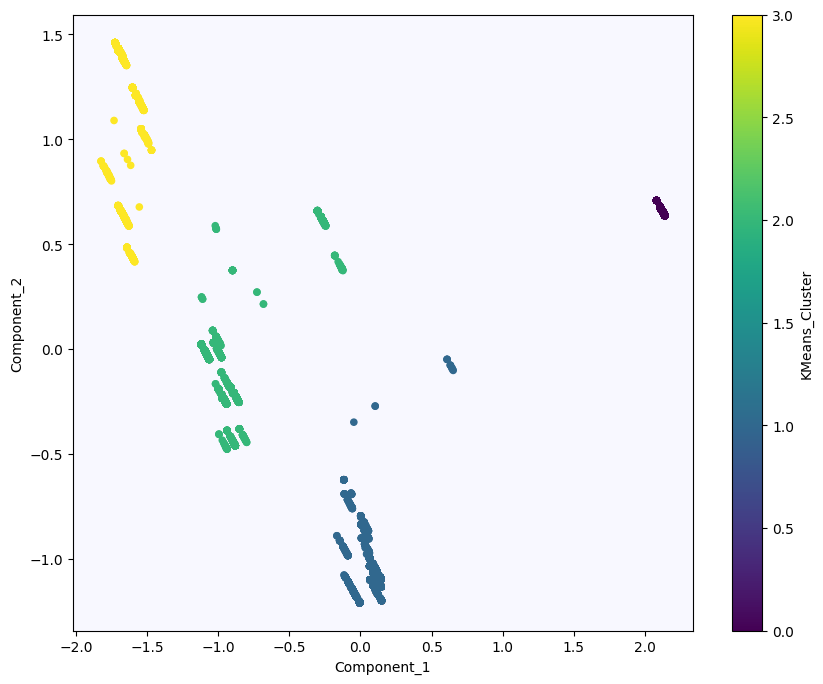

<matplotlib.axes._subplots.AxesSubplot at 0x7f9f8d345880>

In [0]:
pca_nombres.plot.scatter(x='Component_1', y='Component_2', c='KMeans_Cluster', cmap='viridis', figsize=(10, 8))

In [0]:
px.scatter(pca_nombres, x="Component_1", y="Component_2", color="KMeans_Cluster", color_continuous_scale=px.colors.sequential.Viridis)

Out[149]:

## DESCRIPTION OF THE CLUSTERS

In [0]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [0]:
df.groupby('KMeans_Cluster').sum()

Out[151]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Otros 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORIA_Alimentos preparados y conservados 
 SUBCATEGORIA_Bebidas 
 SUBCATEGORIA_Elementos de aseo y limpieza 
 SUBCATEGORIA_Elementos de papelería 
 SUBCATEGORIA_Otros 
 SUBCATEGORIA_Productos de carne y aves de corral 
 SUBCATEGORIA_Productos lácteos y huevos 
 SUBCATEGORIA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 PORTAL_Otros 
 PORTAL_Portal comprador 1 
 PORTAL_Portal comprador 2 
 PORTAL_Portal comprador 24 
 PORTAL_Portal comprador 29 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_SIN_IVA 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 0.00 
 0.00 
 0.00 
 0.00 
 5,439.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 5,439.00 
 0.00 
 0.00 
 5,439.00 
 0.00 
 0.00 
 0.00 
 0.00 
 5,439.00 
 0.00 
 0.68 
 0.68 
 890.25 
 169.15 
 5,247.32 
 
 
 1 
 6,904.00 
 0.00 
 0.00 
 0.00 
 10.00 
 2,241.00 
 1,327.00 
 0.00 
 0.00 
 1,829.00 
 787.00 
 720.00 
 10.00 
 6,911.00 
 0.00 
 0.00 
 3.00 
 402.00 
 104.00 
 3,125.00 
 0.00 
 3,283.00 
 20.68 
 0.55 
 1,024.30 
 117.65 
 6,617.06 
 
 
 2 
 34.00 
 217.00 
 1,199.00 
 4,368.00 
 600.00 
 0.00 
 0.00 
 0.00 
 0.00 
 5,822.00 
 0.00 
 0.00 
 596.00 
 6,396.00 
 5.00 
 0.00 
 17.00 
 1,966.00 
 3,984.00 
 431.00 
 0.00 
 37.00 
 42.16 
 13.21 
 2,142.96 
 330.60 
 5,661.85 
 
 
 3 
 0.00 
 3,621.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1,997.00 
 1,618.00 
 6.00 
 0.00 
 0.00 
 0.00 
 675.00 
 1,414.00 
 0.00 
 1,532.00 
 839.00 
 2,475.00 
 307.00 
 0.00 
 0.00 
 3.22 
 1.58 
 1,559.49 
 213.16 
 3,107.99

# METRICS

In [0]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

# kprototipes

In [0]:
data = df.iloc[: , :-1]

In [0]:
data

Out[154]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Otros 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORIA_Alimentos preparados y conservados 
 SUBCATEGORIA_Bebidas 
 SUBCATEGORIA_Elementos de aseo y limpieza 
 SUBCATEGORIA_Elementos de papelería 
 SUBCATEGORIA_Otros 
 SUBCATEGORIA_Productos de carne y aves de corral 
 SUBCATEGORIA_Productos lácteos y huevos 
 SUBCATEGORIA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 PORTAL_Otros 
 PORTAL_Portal comprador 1 
 PORTAL_Portal comprador 2 
 PORTAL_Portal comprador 24 
 PORTAL_Portal comprador 29 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_SIN_IVA 
 
 
 
 
 0 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.45 
 0.08 
 0.89 
 
 
 1 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.70 
 0.13 
 0.70 
 
 
 2 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.10 
 0.00 
 1.00 
 
 
 3 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.02 
 0.00 
 1.00 
 
 
 4 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.14 
 0.03 
 0.99 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 22387 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.12 
 0.02 
 0.99 
 
 
 22388 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.70 
 0.13 
 0.70 
 
 
 22389 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.32 
 0.06 
 0.95 
 
 
 22390 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.24 
 0.05 
 0.97 
 
 
 22391 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.20 
 0.04 
 0.98 
 
 
 
 22392 rows × 27 columns

### SILHUOETTE

In [0]:
model_KMeans = clustering

In [0]:
metrics.silhouette_score(data, clustering.labels_)

Out[156]: 0.4945190393578563

### AGGLOMERATIVE

In [0]:
model_AGGLOMERATIVE = AgglomerativeClustering(n_clusters = 3).fit(data)

In [0]:
metrics.silhouette_score(data, model_AGGLOMERATIVE.labels_)

Out[158]: 0.4192119319036636

### BIRCH

In [0]:
model_BIRCH = Birch(n_clusters=3).fit(data)

In [0]:
metrics.silhouette_score(data, model_BIRCH.labels_)

Out[160]: 0.3019993019658069

### MINIBATCHKMEANS

In [0]:
model_MINIBATCHKMEANS = MiniBatchKMeans(n_clusters=3, max_iter=300, batch_size=20).fit(data)

In [0]:
metrics.silhouette_score(data, model_MINIBATCHKMEANS.labels_)

Out[162]: 0.31055192964064104

### PUT THE CLUSTER COLUMN TO GRAPH

In [0]:
df['KMeans_Cluster'] = model_KMeans.labels_

In [0]:
df.groupby('KMeans_Cluster').mean()

Out[164]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Otros 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORIA_Alimentos preparados y conservados 
 SUBCATEGORIA_Bebidas 
 SUBCATEGORIA_Elementos de aseo y limpieza 
 SUBCATEGORIA_Elementos de papelería 
 SUBCATEGORIA_Otros 
 SUBCATEGORIA_Productos de carne y aves de corral 
 SUBCATEGORIA_Productos lácteos y huevos 
 SUBCATEGORIA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 PORTAL_Otros 
 PORTAL_Portal comprador 1 
 PORTAL_Portal comprador 2 
 PORTAL_Portal comprador 24 
 PORTAL_Portal comprador 29 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_SIN_IVA 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.16 
 0.03 
 0.96 
 
 
 1 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.32 
 0.19 
 0.00 
 0.00 
 0.26 
 0.11 
 0.10 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.06 
 0.02 
 0.45 
 0.00 
 0.47 
 0.00 
 0.00 
 0.15 
 0.02 
 0.96 
 
 
 2 
 0.01 
 0.03 
 0.19 
 0.68 
 0.09 
 0.00 
 0.00 
 0.00 
 0.00 
 0.91 
 0.00 
 0.00 
 0.09 
 1.00 
 0.00 
 0.00 
 0.00 
 0.31 
 0.62 
 0.07 
 0.00 
 0.01 
 0.01 
 0.00 
 0.33 
 0.05 
 0.88 
 
 
 3 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.55 
 0.45 
 0.00 
 0.00 
 0.00 
 0.00 
 0.19 
 0.39 
 0.00 
 0.42 
 0.23 
 0.68 
 0.08 
 0.00 
 0.00 
 0.00 
 0.00 
 0.43 
 0.06 
 0.86

## PREDICTION OF AN INPUT

In [0]:
#This is an example with entrie in row 10
row_to_predict = df_to_predict.iloc[10]
row_to_predict

Out[165]: CATEGORÍA_Alimentos y Bebidas 0.00
CATEGORÍA_Aseo, Cafetería y Oficina 0.00
CATEGORÍA_Dotación y elementos de protección personal 0.00
CATEGORÍA_Otros 1.00
CATEGORÍA_Vigilancia y seguridad industrial 0.00
SUBCATEGORIA_Alimentos preparados y conservados 0.00
SUBCATEGORIA_Bebidas 0.00
SUBCATEGORIA_Elementos de aseo y limpieza 0.00
SUBCATEGORIA_Elementos de papelería 0.00
SUBCATEGORIA_Otros 1.00
SUBCATEGORIA_Productos de carne y aves de corral 0.00
SUBCATEGORIA_Productos lácteos y huevos 0.00
SUBCATEGORIA_Seguridad y protección personal 0.00
PROVEEDOR_Otros 1.00
PROVEEDOR_Proveedor 28 0.00
PROVEEDOR_Proveedor 301 0.00
PROVEEDOR_Proveedor 59 0.00
PORTAL_Otros 0.00
PORTAL_Portal comprador 1 1.00
PORTAL_Portal comprador 2 0.00
PORTAL_Portal comprador 24 0.00
PORTAL_Portal comprador 29 0.00
CANTIDAD_PEDIDA 0.00
CANTIDAD_RECIBIDA 0.00
PRECIO_UNITARIO 0.01
IVA 0.00
TOTAL_SIN_IVA 1.00
Name: 10, dtype: float64

In [0]:
row_to_predict.values.reshape(1,-1)

Out[166]: array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 6.29658549e-04, 0.00000000e+00,
 1.42842540e-02, 0.00000000e+00, 9.99897777e-01]])

In [0]:
row_to_predict = row_to_predict.values.reshape(1,-1)

In [0]:
clustering.predict(row_to_predict)

Out[168]: array([2], dtype=int32)